In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm.auto import tqdm  # progress bar

# 골 과정 기여도와 골 마무리 기여도

In [58]:
df1 = pd.read_csv('./data/origin/understat_2022.csv',  encoding='utf-8')
df2 = pd.read_csv('./data/origin/1xbet_offensive_2022.csv',  encoding='utf-8')

df = pd.merge(df1, df2, left_on = 'Player', right_on = 'Name')
df.columns

Index(['No', 'Player', 'Team_x', 'Apps_x', 'Min', 'G', 'NPG', 'A', 'xG',
       'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90', 'xA90',
       'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'Name',
       'Team_y', 'Age', 'Position', 'Apps_y', 'Mins', 'Goals', 'Assists',
       'SpG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating'],
      dtype='object')

In [59]:
df['xG + xA'] = df['xG'] + df['xA']

<Axes: title={'center': 'Player involved in team attack'}, xlabel='expected buildup', ylabel='expected goal + assist'>

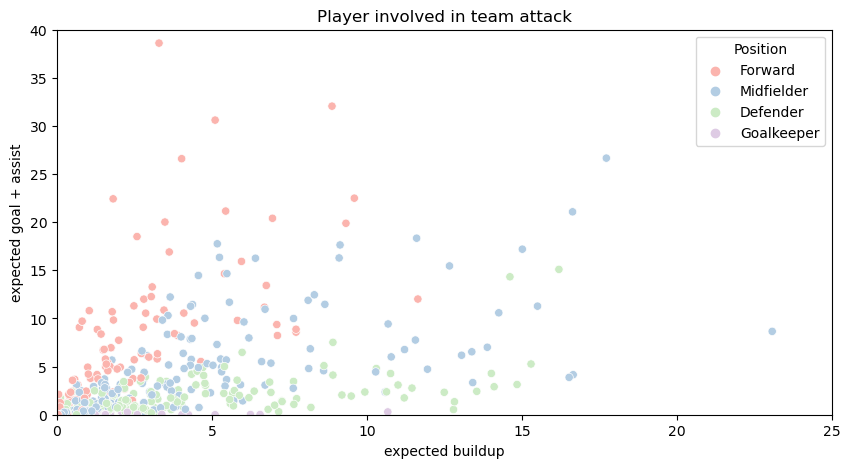

In [60]:
plt.figure(figsize = (10, 5))
plt.xlabel('expected buildup')
plt.ylabel('expected goal + assist')
plt.title('Player involved in team attack')
plt.axis([0, 25, 0, 40])
sns.scatterplot(data = df, x = 'xGBuildup', y = 'xG + xA', hue = 'Position', palette = 'Pastel1')

# 선수 스탯과 연봉 비교하기

In [61]:
salary_path = './data/new/capology_all0.csv'
salary = pd.read_csv(salary_path)
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6140 non-null   object
 1   money-w  6140 non-null   int64 
 2   money-y  6140 non-null   int64 
 3   money-a  6140 non-null   int64 
 4   team     6140 non-null   object
 5   year     6140 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 287.9+ KB


In [62]:
players_path = './data/new/players_all.csv'
players = pd.read_csv(players_path)
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4756 non-null   int64 
 1   No.         4756 non-null   int64 
 2   year        4756 non-null   int64 
 3   Name        4756 non-null   object
 4   Age         4756 non-null   int64 
 5   Team        4756 non-null   object
 6   Position    4756 non-null   object
dtypes: int64(4), object(3)
memory usage: 260.2+ KB


In [64]:
# 데이터가 players에 없거나 salary에 없는 경우가 있기에 그런 경우를 제외하기 위해 inner join
player_salary = pd.merge(players, salary, left_on = ['Name', 'year'], right_on = ['Name', 'year'], how = 'inner')
player_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 0 to 4576
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4577 non-null   int64 
 1   No.         4577 non-null   int64 
 2   year        4577 non-null   int64 
 3   Name        4577 non-null   object
 4   Age         4577 non-null   int64 
 5   Team        4577 non-null   object
 6   Position    4577 non-null   object
 7   money-w     4577 non-null   int64 
 8   money-y     4577 non-null   int64 
 9   money-a     4577 non-null   int64 
 10  team        4577 non-null   object
dtypes: int64(7), object(4)
memory usage: 429.1+ KB


In [65]:
# 선수 기본 정보와 연봉 데이터만 가지도록 수정
player_salary = player_salary[['year', 'Name', 'Age', 'Team', 'Position', 'money-w']]
player_salary.head()

,year,Name,Age,Team,Position,money-w
0,2014,Eden Hazard,23,Chelsea,Forward,185827
1,2014,Alexis Sanchez,25,Arsenal,Forward,140000
2,2014,Sergio Aguero,26,Man City,Forward,160000
3,2014,Cesc Fabregas,27,Chelsea,Midfielder,171481
4,2014,Santi Cazorla,29,Arsenal,Midfielder,90000


In [67]:
player_salary[player_salary['Name'] == 'Eden Hazard']

,year,Name,Age,Team,Position,money-w
0,2014,Eden Hazard,23,Chelsea,Forward,185827
612,2015,Eden Hazard,24,Chelsea,Forward,178577
1084,2016,Eden Hazard,25,Chelsea,Forward,215346
1623,2017,Eden Hazard,26,Chelsea,Forward,222865
2134,2018,Eden Hazard,27,Chelsea,Forward,224423


In [68]:
# 1xbet 데이터를 불러와 salary와 rating간의 연관성을 확인
stats = pd.read_csv('./data/new/1xbet_all.csv')
stats.head()

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,...,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks,year
0,Eden Hazard,Chelsea,32,Forward,38,3379,14,9,2.052632,2.631579,...,2.105263,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,2014
1,Alexis Sanchez,Arsenal,34,Forward,35,2953,16,8,3.485714,2.342857,...,2.114286,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,2014
2,Sergio Aguero,Man City,35,Forward,33,2540,26,8,4.484848,1.000000,...,1.939394,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,2014
3,Cesc Fabregas,Chelsea,36,Midfielder,34,2890,3,18,1.264706,2.794118,...,1.000000,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,2014
4,Santi Cazorla,Arsenal,38,Midfielder,37,2992,7,11,2.513514,2.108108,...,1.000000,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,2014


In [69]:
# merge를 위한 데이터와 Rating 값만 추출
rating = stats[['Name', 'year', 'Rating']]
rating

,Name,year,Rating
0,Eden Hazard,2014,7.956842
1,Alexis Sanchez,2014,7.810857
2,Sergio Aguero,2014,7.671515
3,Cesc Fabregas,2014,7.618529
4,Santi Cazorla,2014,7.599459
...,...,...,...
4751,Chris Wood,2022,6.295200
4752,Danny Ings,2022,6.457429
4753,Daniel James,2022,6.292917
4754,Craig Dawson,2022,6.553600


In [72]:
# player_salary와 rating 데이터 merge
salary_rating = pd.merge(player_salary, rating, left_on = ['Name', 'year'], right_on = ['Name', 'year'])
salary_rating[['Position', 'money-w', 'Rating']]

,Position,money-w,Rating
0,Forward,185827,7.956842
1,Forward,140000,7.810857
2,Forward,160000,7.671515
3,Midfielder,171481,7.618529
4,Midfielder,90000,7.599459
...,...,...,...
4572,Forward,3462,5.950000
4573,Defender,38000,5.950000
4574,Midfielder,30000,5.950000
4575,Midfielder,35000,5.885000


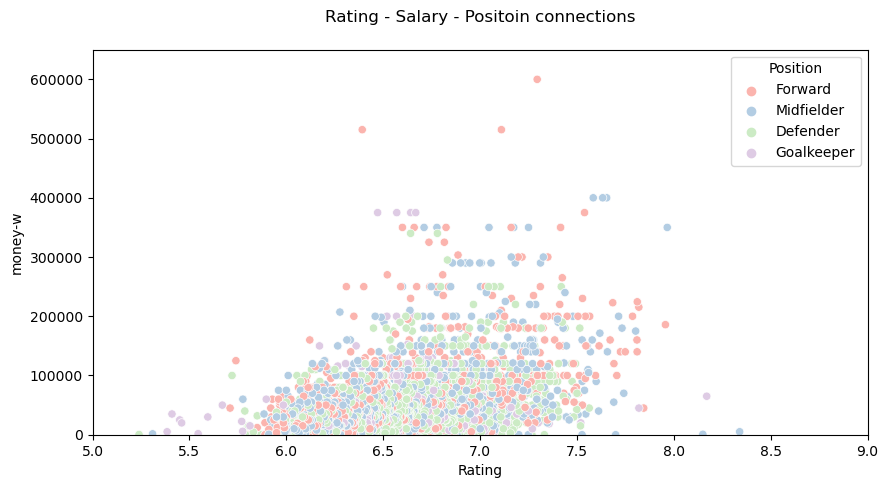

In [71]:
# Rating점수와 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.title('Rating - Salary - Positoin connections', pad = 20)
plt.axis([5, 9, 0, 650000])
sns.scatterplot(data = salary_rating, x = 'Rating', y = 'money-w', hue = 'Position', palette = 'Pastel1')
plt.show()

# understat 데이터의 기대수치들과 연봉의 관계를 확인해보기

In [73]:
# understat 데이터와 연봉과의 관계성
understat = pd.read_csv('./data/new/understat_all0.csv')
understat.head()

,No,Name,Team,Apps,Min,G,NPG,A,xG,NPxG,...,xGChain,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90,year
0,619,Sergio Aguero,Manchester City,33,2551,26,21,8,25.27,20.70,...,27.81,6.88,0.89,0.73,0.20,1.09,0.93,0.98,0.24,2014
1,647,Harry Kane,Tottenham,34,2589,21,19,4,17.16,14.87,...,16.49,5.55,0.60,0.52,0.14,0.73,0.65,0.57,0.19,2014
2,802,Diego Costa,Chelsea,26,2111,20,19,3,15.22,14.46,...,21.37,5.28,0.65,0.62,0.19,0.84,0.81,0.91,0.22,2014
3,848,Charlie Austin,Queens Park Rangers,35,3078,18,15,5,17.88,14.08,...,13.72,3.04,0.52,0.41,0.07,0.60,0.49,0.40,0.09,2014
4,498,Alexis Sanchez,Arsenal,35,2967,16,16,8,13.45,12.69,...,27.16,10.74,0.41,0.38,0.26,0.67,0.64,0.82,0.33,2014


In [74]:
player_salary.columns

Index(['year', 'Name', 'Age', 'Team', 'Position', 'money-w'], dtype='object')

In [75]:
salary_understat = pd.merge(player_salary, understat, left_on = ['Name', 'year'], right_on = ['Name', 'year']
                            , how = 'inner')
print(salary_understat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4573
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4574 non-null   int64  
 1   Name         4574 non-null   object 
 2   Age          4574 non-null   int64  
 3   Team_x       4574 non-null   object 
 4   Position     4574 non-null   object 
 5   money-w      4574 non-null   int64  
 6   No           4574 non-null   int64  
 7   Team_y       4574 non-null   object 
 8   Apps         4574 non-null   int64  
 9   Min          4574 non-null   int64  
 10  G            4574 non-null   int64  
 11  NPG          4574 non-null   int64  
 12  A            4574 non-null   int64  
 13  xG           4574 non-null   float64
 14  NPxG         4574 non-null   float64
 15  xA           4574 non-null   float64
 16  xGChain      4574 non-null   float64
 17  xGBuildup    4574 non-null   float64
 18  xG90         4574 non-null   float64
 19  NPxG90

In [76]:
salary_understat['xG + xA'] = salary_understat['xG'] +  salary_understat['xA']
salary_understat.describe()

,year,Age,money-w,No,Apps,Min,G,NPG,A,xG,...,xGChain,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90,xG + xA
count,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,...,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,2017.900525,25.938784,54256.186052,2821.236773,20.597289,1465.733494,1.965457,1.811981,1.367731,2.070931,...,5.497794,3.272285,0.138395,0.131710,0.090920,0.229324,0.222624,0.353953,0.202602,3.516819
std,2.602701,4.210430,52559.642397,2976.184203,11.396404,1023.852553,3.489591,3.141753,2.166050,3.293645,...,5.620798,3.366458,0.251286,0.245631,0.215871,0.351234,0.346201,0.401021,0.267060,4.755220
min,2014.000000,15.000000,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,23.000000,22500.000000,652.000000,11.000000,543.250000,0.000000,0.000000,0.000000,0.120000,...,1.330000,0.740000,0.012500,0.010000,0.010000,0.050000,0.050000,0.150000,0.090000,0.390000
50%,2018.000000,26.000000,40000.000000,960.500000,22.000000,1387.500000,1.000000,1.000000,0.500000,0.850000,...,3.740000,2.340000,0.060000,0.060000,0.060000,0.130000,0.130000,0.290000,0.160000,1.770000
75%,2020.000000,29.000000,70000.000000,5555.000000,31.000000,2307.500000,2.000000,2.000000,2.000000,2.480000,...,7.910000,4.690000,0.180000,0.170000,0.130000,0.330000,0.320000,0.460000,0.260000,4.627500
max,2022.000000,41.000000,600000.000000,11385.000000,38.000000,3420.000000,36.000000,31.000000,20.000000,32.760000,...,37.800000,23.960000,7.010000,7.010000,8.940000,8.940000,8.940000,8.940000,8.940000,38.610000


In [78]:
salary_understat[salary_understat['Name'] == 'Cristiano Ronaldo'][['year', 'Name', 'Age', 'Team_x', 'Position', 
                                                           'money-w', 'G', 'xG', 'A', 'xA', 'xG + xA',
                                                           'xGBuildup']]

,year,Name,Age,Team_x,Position,money-w,G,xG,A,xA,xG + xA,xGBuildup
3613,2021,Cristiano Ronaldo,36,Man Utd,Forward,515000,18,17.21,3,4.42,21.63,7.72
4406,2022,Cristiano Ronaldo,37,Man Utd,Forward,515000,1,2.14,0,0.31,2.45,0.94


In [88]:
# 연봉 순위
rank = salary_understat[['Name', 'money-w']].sort_values(by = 'money-w', ascending = False)
pd.DataFrame(rank.groupby(['Name', 'money-w']).mean()).sort_values(by = 'money-w', ascending = False).head(15)

,
Name,money-w
Gareth Bale,600000
Cristiano Ronaldo,515000
Kevin De Bruyne,400000
Erling Haaland,375000
David de Gea,375000
Mesut Ozil,350000
Jadon Sancho,350000
Casemiro,350000
Kevin De Bruyne,350000


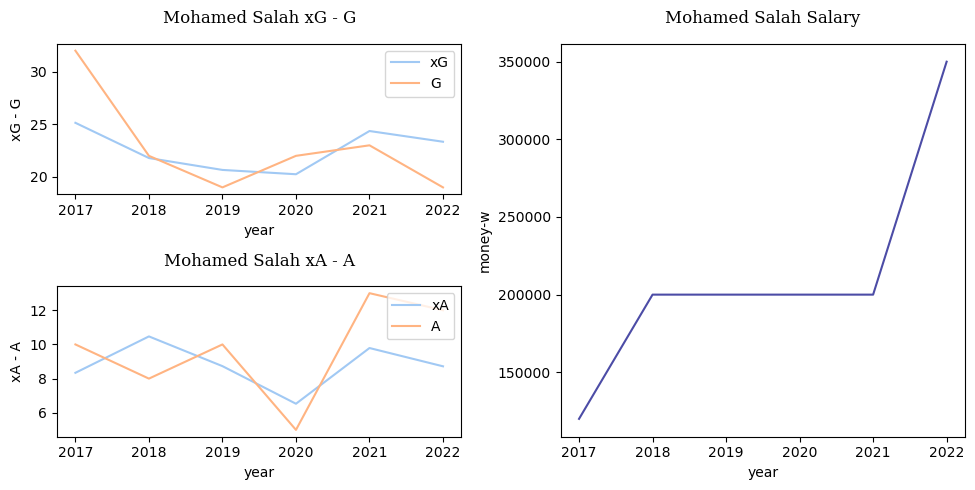

In [89]:
# 특정 선수의 스탯과 연봉 데이터
player_name = 'Mohamed Salah'
one_player = salary_understat[salary_understat['Name'] == player_name]

plt.figure(figsize = (10, 5))

# xG - G
sns.set_palette('pastel')
plt.subplot(2, 2, 1)
plt.title(f'{player_name} xG - G', pad = 15, fontfamily = 'serif')
plt.ylabel('xG - G')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xG', label = 'xG')
sns.lineplot(data = one_player, x = 'year', y = 'G', label = 'G')
plt.legend(loc = 'upper right')

# xA - A
sns.set_palette('pastel')
plt.subplot(2, 2, 3)
plt.title(f'{player_name} xA - A', pad = 15, fontfamily = 'serif')
plt.ylabel('xA - A')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xA', label = 'xA')
sns.lineplot(data = one_player, x = 'year', y = 'A', label = 'A')
plt.legend(loc = 'upper right')

# Salary
plt.subplot(1, 2, 2)
plt.title(f'{player_name} Salary', pad = 15, fontfamily = 'serif')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'money-w', color = 'navy', alpha = 0.7)

plt.tight_layout()
plt.show()

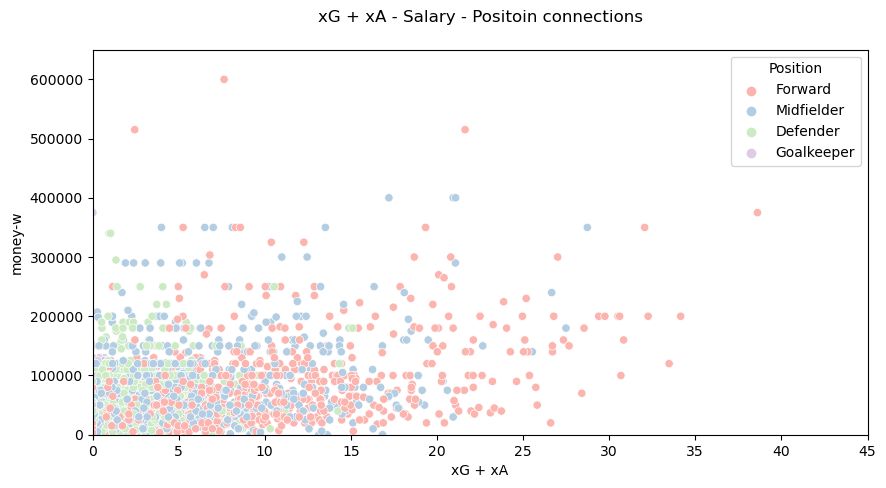

In [91]:
# x값들과 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 45, 0, 650000])
plt.title('xG + xA - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_understat, x = 'xG + xA', y = 'money-w', hue = 'Position', palette = 'Pastel1')
plt.show()

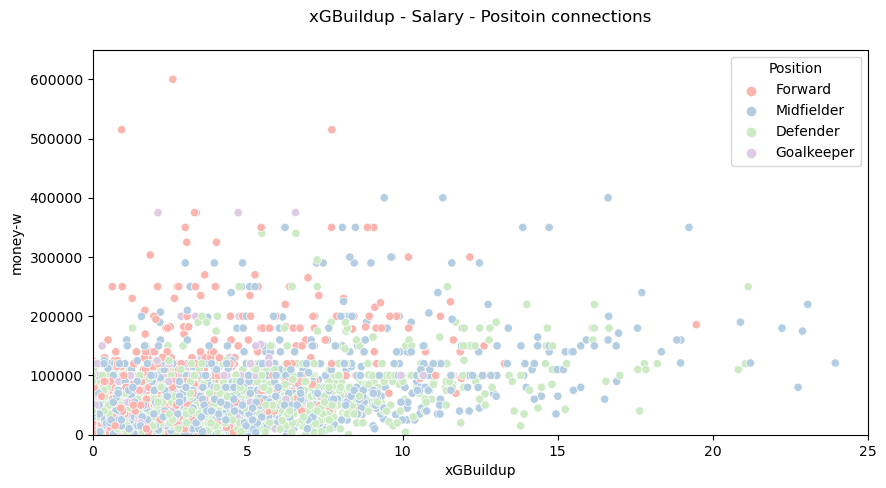

In [92]:
# xGBuildup와 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 25, 0, 650000])
plt.title('xGBuildup - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_understat, x = 'xGBuildup', y = 'money-w', hue = 'Position', palette = 'Pastel1')
plt.show()